In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA,FastICA

In [2]:
time_range = np.arange(0, 50, 0.05)

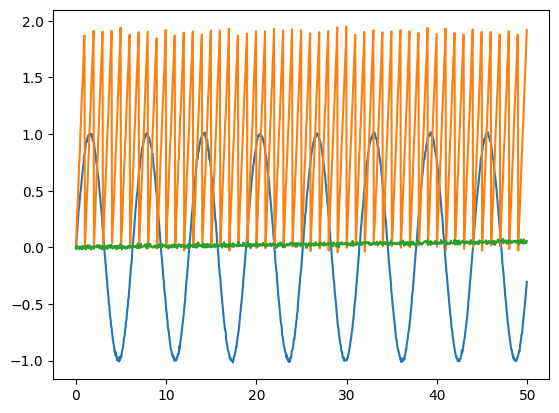

In [3]:
def generate_data(time_range : np.array, noise_multiplier : float = 0.0001) -> np.array:
    
    size = len(time_range)

    f1 = np.sin(time_range) + noise_multiplier * np.random.standard_normal(size = size)
    f2 = 2 * (time_range - np.floor(time_range)) + 2 * noise_multiplier * np.random.standard_normal(size = size)
    f3 = 0.001 * time_range + noise_multiplier * np.random.standard_normal(size = size)
    return np.stack([f1,f2,f3])

data = generate_data(time_range, 0.01)

plt.plot(time_range, data.transpose())
plt.show()

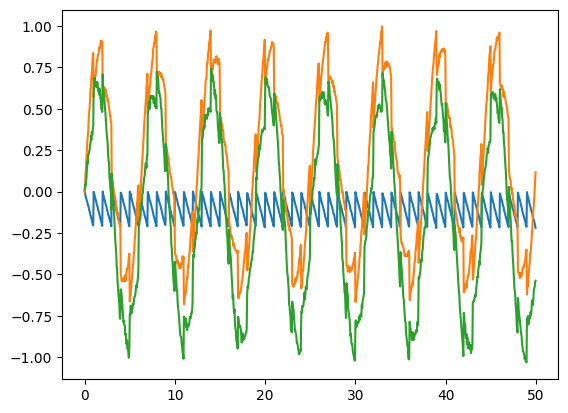

In [4]:
def mix_data(data : np.array) -> np.array:

    a = np.random.standard_normal(size = [3,3])
    return np.matmul(a, data)

mixed_data = mix_data(data)

input_data = mixed_data.transpose()

plt.plot(time_range, mixed_data.transpose())
plt.show()

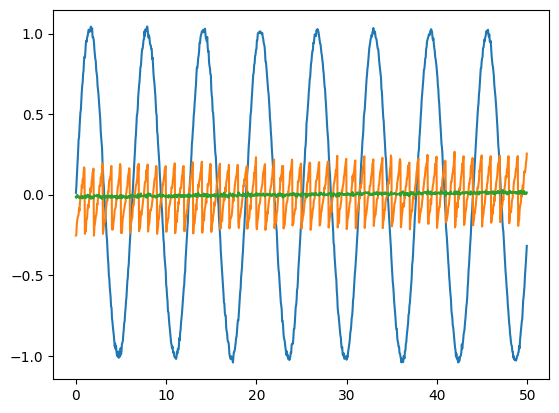

In [5]:
pca = PCA()
pca_result = pca.fit(input_data).transform(input_data)

plt.plot(time_range, pca_result)
plt.show()

c:\Users\Tobias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


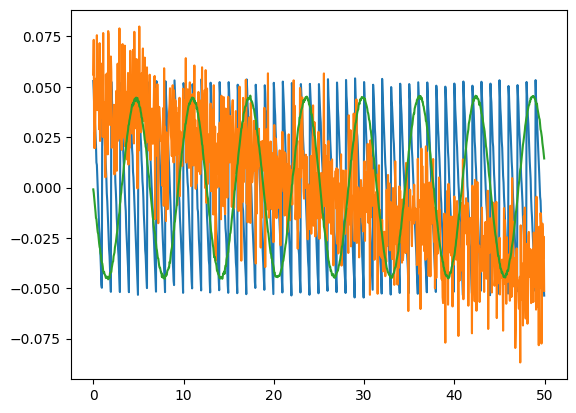

In [6]:
ica = FastICA()
ica_result = ica.fit(input_data).transform(input_data)

plt.plot(time_range, ica_result)
plt.show()

--- Sample Reconstruction (X and Xr) ---
left column: original waveform		 right column: recovered waveform


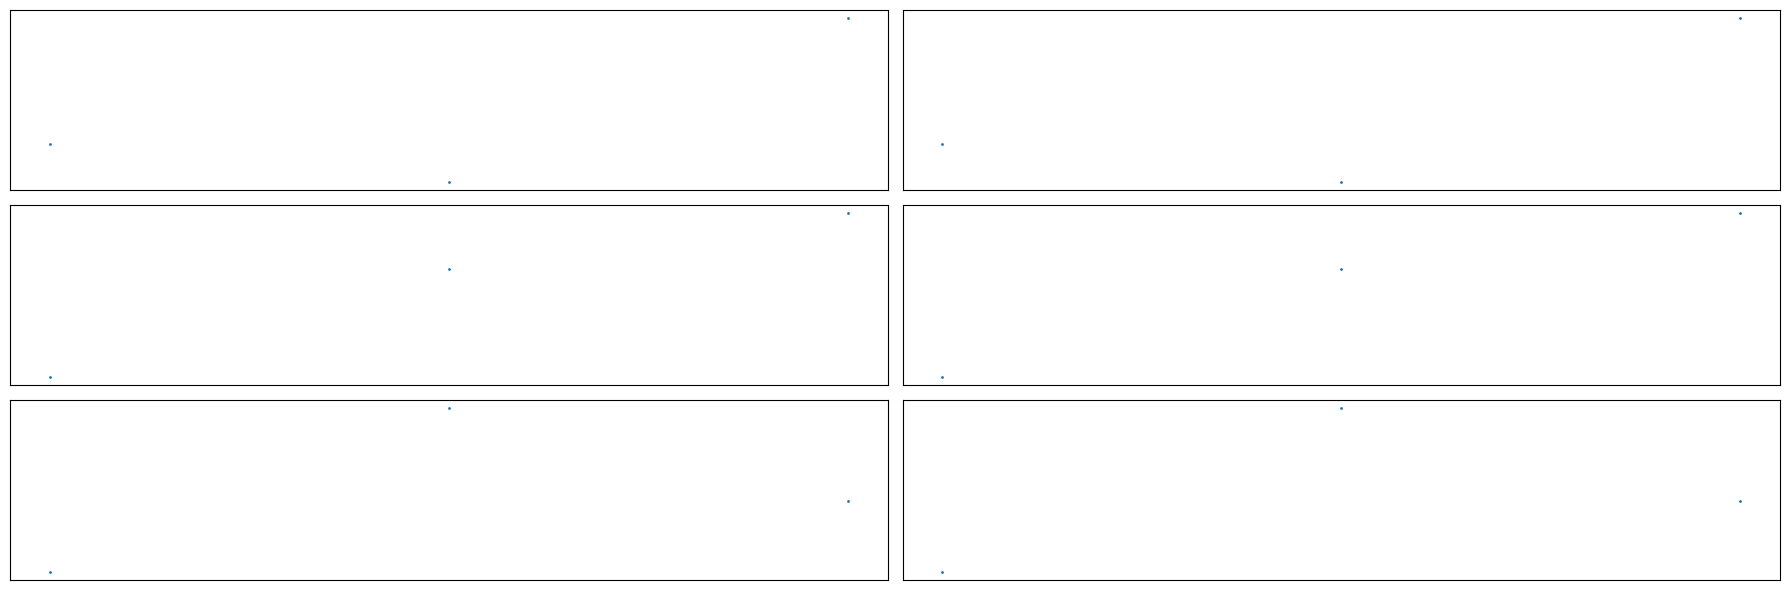

rMSE =  2.3327954141520137e-31
--- Distance Matrices (D and Dz) ---


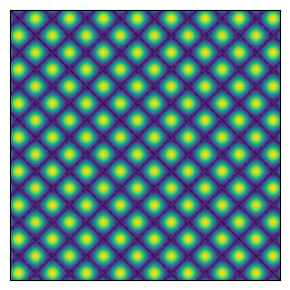

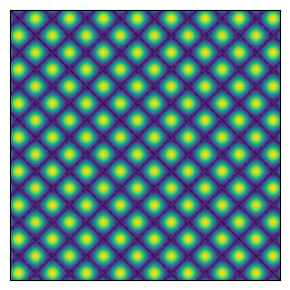

Residual Variance (using Pearson's r) =  0.0
Residual Variance (using Spearman's r) =  8.690825836765725e-13
--- Ranking Matrices (R and Rz) ---


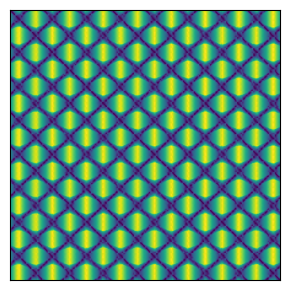

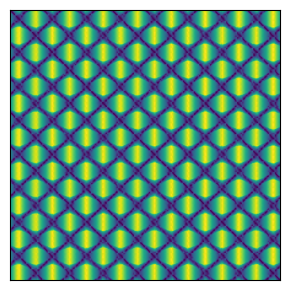

--- Co-ranking Matrix (Q) ---


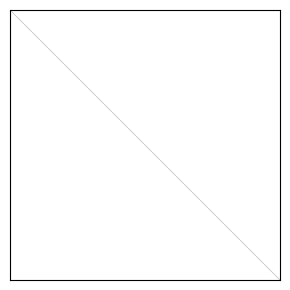

--- Trustworthiness T(k) and Continuity C(k) ---


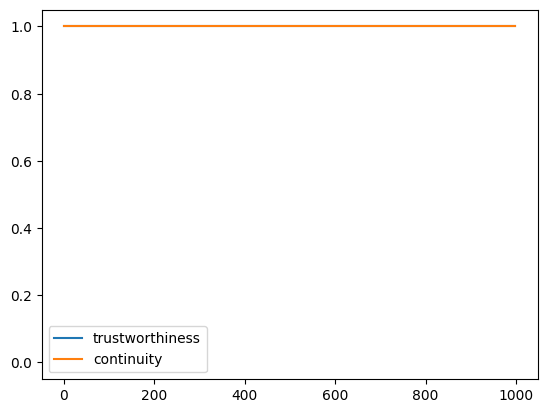

AUC of T =  1.0
AUC of C =  1.0
--- QNN(k) Curve ---


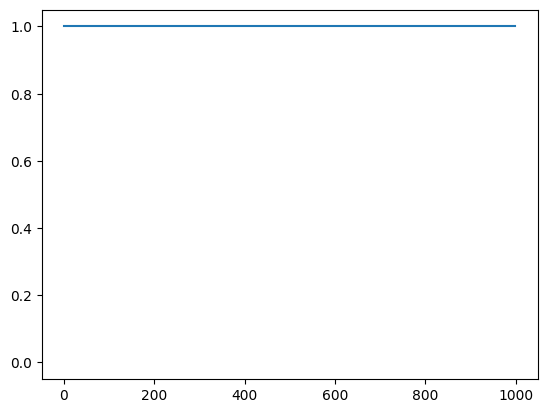

AUC of QNN =  1.0010010010010009
--- LCMC(k) Curve ---


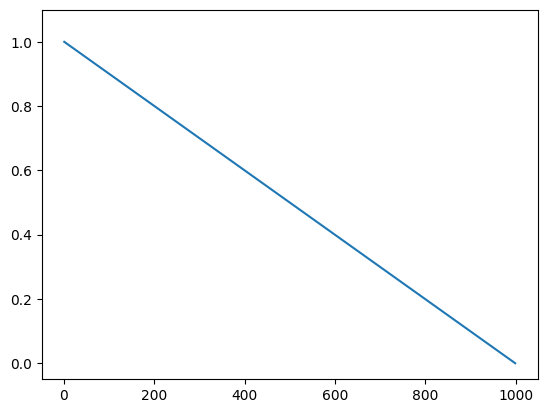

kmax (0-based index) =  0
Qlocal =  1.001001001001001
Qglobal =  1.0010010010010009


In [7]:
from pyDRMetrics.pyDRMetrics import *

reconstructed_input = pca.inverse_transform(pca_result)

drm = DRMetrics(input_data, pca_result, reconstructed_input)
drm.report()

In [ ]:
import coranking
from coranking.metrics import trustworthiness, continuity, LCMC

Q = coranking.coranking_matrix(input_data, pca_result)

trust_isomap = trustworthiness(Q, min_k=1, max_k=50)
cont_isomap = continuity(Q, min_k=1, max_k=50)
lcmc_isomap = LCMC(Q, min_k=1, max_k=50)

ModuleNotFoundError: No module named 'coranking'